In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 6

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/8 [==>...........................] - ETA: 6s - loss: 1.9183 - accuracy: 0.1875
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 2s 83ms/step - loss: 1.9128 - accuracy: 0.1838 - val_loss: 1.8461 - val_accuracy: 0.1360
Epoch 2/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.9033 - accuracy: 0.1172
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 25ms/step - loss: 1.8482 - accuracy: 0.1939 - val_loss: 1.7926 - val_accuracy: 0.1450
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.8133 - accuracy: 0.2109
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 23ms/step - loss: 1.7908 - accuracy: 0.2030 - val_loss: 1.7541 - val_accuracy: 0.1782
Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.7889 - accuracy: 0.1719
Epoch 4: sav

8/8 [==============================] - 0s 23ms/step - loss: 1.1083 - accuracy: 0.6212 - val_loss: 0.8816 - val_accuracy: 0.7734
Epoch 29/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.0497 - accuracy: 0.6250
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 23ms/step - loss: 1.0786 - accuracy: 0.6364 - val_loss: 0.8450 - val_accuracy: 0.7825
Epoch 30/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.0546 - accuracy: 0.6719
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 25ms/step - loss: 1.0325 - accuracy: 0.6535 - val_loss: 0.8058 - val_accuracy: 0.8278
Epoch 31/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.9769 - accuracy: 0.6797
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 18ms/step - loss: 1.0066 - accuracy: 0.6384 - val_loss: 0.

Epoch 56/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.7500
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 25ms/step - loss: 0.6798 - accuracy: 0.7566 - val_loss: 0.3727 - val_accuracy: 0.9396
Epoch 57/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6889 - accuracy: 0.8125
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 26ms/step - loss: 0.6751 - accuracy: 0.7566 - val_loss: 0.3601 - val_accuracy: 0.9396
Epoch 58/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7217 - accuracy: 0.7109
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 25ms/step - loss: 0.6867 - accuracy: 0.7424 - val_loss: 0.3562 - val_accuracy: 0.9366
Epoch 59/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6731 - accuracy: 0.7578
Epoch

1/8 [==>...........................] - ETA: 0s - loss: 0.6050 - accuracy: 0.8203
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 23ms/step - loss: 0.5752 - accuracy: 0.8111 - val_loss: 0.2547 - val_accuracy: 0.9456
Epoch 84/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7614 - accuracy: 0.7891
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 23ms/step - loss: 0.5940 - accuracy: 0.7980 - val_loss: 0.2537 - val_accuracy: 0.9486
Epoch 85/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5270 - accuracy: 0.8359
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 24ms/step - loss: 0.5231 - accuracy: 0.8030 - val_loss: 0.2476 - val_accuracy: 0.9517
Epoch 86/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.4957 - accuracy: 0.8438
Epoch 86: saving mo

1/8 [==>...........................] - ETA: 0s - loss: 0.3902 - accuracy: 0.8672
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 23ms/step - loss: 0.4721 - accuracy: 0.8404 - val_loss: 0.1798 - val_accuracy: 0.9728
Epoch 111/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5819 - accuracy: 0.7812
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 22ms/step - loss: 0.5118 - accuracy: 0.8303 - val_loss: 0.1760 - val_accuracy: 0.9728
Epoch 112/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6665 - accuracy: 0.7266
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 25ms/step - loss: 0.5147 - accuracy: 0.8172 - val_loss: 0.1792 - val_accuracy: 0.9637
Epoch 113/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5142 - accuracy: 0.8281
Epoch 113: sa

1/8 [==>...........................] - ETA: 0s - loss: 0.4865 - accuracy: 0.8438
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 25ms/step - loss: 0.4702 - accuracy: 0.8374 - val_loss: 0.1435 - val_accuracy: 0.9758
Epoch 138/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.4229 - accuracy: 0.8203
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 25ms/step - loss: 0.4781 - accuracy: 0.8333 - val_loss: 0.1414 - val_accuracy: 0.9758
Epoch 139/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.3616 - accuracy: 0.8516
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 25ms/step - loss: 0.4617 - accuracy: 0.8273 - val_loss: 0.1411 - val_accuracy: 0.9758
Epoch 140/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5615 - accuracy: 0.7656
Epoch 140: sa

1/8 [==>...........................] - ETA: 0s - loss: 0.3951 - accuracy: 0.8594
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 25ms/step - loss: 0.3871 - accuracy: 0.8667 - val_loss: 0.1266 - val_accuracy: 0.9789
Epoch 165/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.4063 - accuracy: 0.8672
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 25ms/step - loss: 0.4401 - accuracy: 0.8596 - val_loss: 0.1273 - val_accuracy: 0.9789
Epoch 166/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.4523 - accuracy: 0.8438
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 24ms/step - loss: 0.4342 - accuracy: 0.8556 - val_loss: 0.1250 - val_accuracy: 0.9789
Epoch 167/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.9062
Epoch 167: sa

1/8 [==>...........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.9141
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 26ms/step - loss: 0.4124 - accuracy: 0.8566 - val_loss: 0.1109 - val_accuracy: 0.9789
Epoch 192/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.3828 - accuracy: 0.8906
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 26ms/step - loss: 0.3860 - accuracy: 0.8747 - val_loss: 0.1090 - val_accuracy: 0.9849
Epoch 193/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.4092 - accuracy: 0.8750
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 24ms/step - loss: 0.4047 - accuracy: 0.8667 - val_loss: 0.1075 - val_accuracy: 0.9819
Epoch 194/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.8984
Epoch 194: sa

1/8 [==>...........................] - ETA: 0s - loss: 0.3959 - accuracy: 0.8828
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 24ms/step - loss: 0.4181 - accuracy: 0.8455 - val_loss: 0.1047 - val_accuracy: 0.9879
Epoch 219/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.3385 - accuracy: 0.8594
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 22ms/step - loss: 0.3621 - accuracy: 0.8667 - val_loss: 0.1055 - val_accuracy: 0.9849
Epoch 220/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.3648 - accuracy: 0.8906
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 23ms/step - loss: 0.4130 - accuracy: 0.8586 - val_loss: 0.1033 - val_accuracy: 0.9819
Epoch 221/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.3462 - accuracy: 0.9062
Epoch 221: sa

1/8 [==>...........................] - ETA: 0s - loss: 0.3953 - accuracy: 0.8750
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 22ms/step - loss: 0.3624 - accuracy: 0.8778 - val_loss: 0.0914 - val_accuracy: 0.9849
Epoch 246/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.4153 - accuracy: 0.8672
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 24ms/step - loss: 0.3585 - accuracy: 0.8727 - val_loss: 0.0903 - val_accuracy: 0.9849
Epoch 247/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.3813 - accuracy: 0.8672
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 22ms/step - loss: 0.3564 - accuracy: 0.8838 - val_loss: 0.0892 - val_accuracy: 0.9879
Epoch 248/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.3547 - accuracy: 0.8750
Epoch 248: sa

1/8 [==>...........................] - ETA: 0s - loss: 0.4176 - accuracy: 0.8828
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 23ms/step - loss: 0.3499 - accuracy: 0.8798 - val_loss: 0.0923 - val_accuracy: 0.9849
Epoch 273/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.1817 - accuracy: 0.9219
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 24ms/step - loss: 0.3267 - accuracy: 0.8899 - val_loss: 0.0908 - val_accuracy: 0.9849
Epoch 274/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.2555 - accuracy: 0.9453
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 24ms/step - loss: 0.3488 - accuracy: 0.8808 - val_loss: 0.0898 - val_accuracy: 0.9849
Epoch 275/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.8750
Epoch 275: sa

1/8 [==>...........................] - ETA: 0s - loss: 0.3516 - accuracy: 0.8672
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 23ms/step - loss: 0.3537 - accuracy: 0.8677 - val_loss: 0.0876 - val_accuracy: 0.9849
Epoch 300/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.2298 - accuracy: 0.9219
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 24ms/step - loss: 0.3287 - accuracy: 0.8869 - val_loss: 0.0872 - val_accuracy: 0.9849
Epoch 301/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.3638 - accuracy: 0.8828
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 17ms/step - loss: 0.3692 - accuracy: 0.8747 - val_loss: 0.0867 - val_accuracy: 0.9849
Epoch 302/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8672
Epoch 302: sa

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 6ms/step - loss: 0.0847 - accuracy: 0.9879


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 183ms/step
[1.4569316e-05 1.0334203e-04 8.7655394e-07 3.4443305e-03 9.9642247e-01
 1.4409593e-05]
4


# 混同行列

11/11 [==============================] - 0s 2ms/step


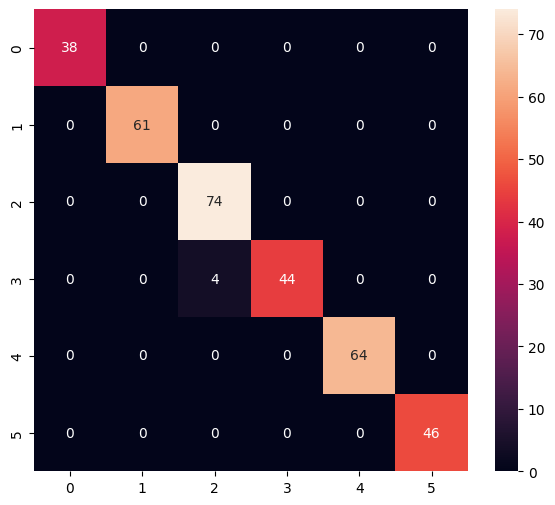

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        61
           2       0.95      1.00      0.97        74
           3       1.00      0.92      0.96        48
           4       1.00      1.00      1.00        64
           5       1.00      1.00      1.00        46

    accuracy                           0.99       331
   macro avg       0.99      0.99      0.99       331
weighted avg       0.99      0.99      0.99       331



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\yupen\AppData\Local\Temp\tmpu63wfiie\assets


6632

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.4569316e-05 1.0334192e-04 8.7655394e-07 3.4443301e-03 9.9642247e-01
 1.4409607e-05]
4
